# Day 4

## Group, Join, Conditionals, Iteration

# Announcements

- No late work is accepted unless it is due to emergency
- No homework solution is posted. We will point out where you did wrong. For questions about grading, contact TA or instructor

# Grouping

Classifying variables

In [1]:
#: imports!

import numpy as np
from datascience import *

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Our familiar NBA data...

In [2]:
#: read from csv and relabel
nba = Table.read_table('nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


## How big is each team?

- We know how to do this: `.group()`.
- Can visualize distribution of team sizes with `.hist()`.

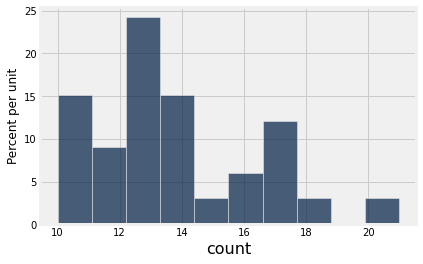

In [77]:
nba.group('TEAM').hist('count')

## How much does each team pay in payroll?

- Instead of counting, we want to sum the `SALARY` column.

In [62]:
nba.select('TEAM','SALARY').group('TEAM',np.sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


- `sum` is applied to all columns (besides `TEAM`)
- Notice how columns get renamed automatically.
- But we can't sum all columns. E.g., `PLAYER`.
- In those cases: empty column.

## Which position has the highest average salary?

- We need to group by position.
- Within each group, find the average.
- Then sort by average salary.

In [12]:
nba.select('POSITION',"SALARY").group('POSITION',np.mean).sort(1,descending= True ).column(0)

array(['C', 'SF', 'PG', 'PF', 'SG'], dtype='<U2')

## What is the max salary of each position?

- Group by position.
- Within each group, use `max`.

In [24]:
nba.group("POSITION",max)

POSITION,PLAYER max,TEAM max,SALARY max
C,Zaza Pachulia,Washington Wizards,22.3594
PF,Zach Randolph,Washington Wizards,22.1927
PG,Zach LaVine,Washington Wizards,21.4687
SF,Wilson Chandler,Washington Wizards,25
SG,Zoran Dragic,Washington Wizards,20


## For each position, which team has the most players at that position?

- We want to count...
- but sizes of groups within groups.
- i.e., sizes of position groups within teams.

In [60]:
nba.group(['TEAM','POSITION']).sort('count',descending= True).show()

TEAM,POSITION,count
Memphis Grizzlies,PF,7
Charlotte Hornets,SG,6
Phoenix Suns,SG,6
Atlanta Hawks,SG,5
Brooklyn Nets,SG,5
Los Angeles Clippers,SG,5
Orlando Magic,PF,5
Portland Trail Blazers,SG,5
Toronto Raptors,PG,5
Utah Jazz,PG,5


## What are the number of players at each position on *every* team?

In [78]:
nba.group(['TEAM','POSITION'])

TEAM,POSITION,count
Atlanta Hawks,C,3
Atlanta Hawks,PF,2
Atlanta Hawks,PG,2
Atlanta Hawks,SF,2
Atlanta Hawks,SG,5
Boston Celtics,C,3
Boston Celtics,PF,2
Boston Celtics,PG,4
Boston Celtics,SF,2
Boston Celtics,SG,4


## A better approach: `.pivot()` to create a two-way table

In [79]:
nba.pivot('TEAM','POSITION')

POSITION,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
C,3,3,1,3,2,4,2,4,3,3,1,2,1,2,2,0,1,3,3,1,2,1,2,2,3,3,3,3,3,3
PF,2,2,3,3,2,1,2,2,0,3,4,3,2,4,7,3,2,3,3,4,3,5,4,3,3,0,2,4,3,3
PG,2,4,2,4,2,3,4,2,1,2,2,2,3,1,4,2,4,3,4,3,3,4,1,4,1,2,3,5,5,3
SF,2,2,2,2,2,1,1,4,4,4,2,4,2,3,4,4,3,2,3,3,4,1,3,2,2,3,3,3,3,4
SG,5,4,5,6,4,1,2,2,2,2,3,2,5,1,4,3,3,2,3,2,4,3,3,6,5,3,2,2,3,4


## `.pivot()` can do more than count...

- What is the *average* salary of each position on every team?

In [40]:
nba.pivot('TEAM','POSITION','SALARY',np.mean)

POSITION,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
C,7.58542,2.45046,1.3629,6.77224,10.4244,7.75234,3.23548,2.6163,4.0907,6.54125,22.3594,4,1.1006,8.28678,9.89972,0,2.10929,6.42601,4.85012,12.65,9.34327,11.25,4.60482,8.40356,4.47077,8.98341,4.65,3.10549,1.67439,8.73913
PF,11.0025,3.08548,4.45251,4.68577,3.46744,19.689,11.9135,7.02498,0,7.18637,1.75511,2.4716,9.50958,2.25302,3.36409,10.1971,4.04783,4.79628,6.14024,3.3793,5.82101,5.38906,3.46718,2.1949,2.07956,0,10.5941,3.04844,2.65403,5.24667
PG,4.8817,4.97465,3.9,4.4853,11.1715,6.55159,4.41818,3.72362,13.913,8.45726,9.44549,4.00351,8.50907,5.10312,4.22599,7.65405,3.41535,5.37681,3.8306,3.28334,7.25525,3.05161,2.14477,3.59202,4.23629,7.25678,5.98791,4.75689,1.97374,6.72047
SF,3,4.41716,13.0403,3.76642,1.95816,22.9705,15.3615,7.19577,1.71622,4.49669,4.91972,6.9683,2.2383,10.3064,5.70939,3.56476,1.31965,1.60321,1.93421,8.18091,6.52215,16,3.98364,3.77054,5.46848,5.56282,6.24539,6.22597,6.14697,4.14292
SG,1.80969,2.00755,1.74118,4.04238,6.19447,8.98876,1.21517,0.841949,4.58088,9.0005,9.05854,5.7,3.1901,7,2.67672,7.12338,8.14435,6.42184,8.80617,4.42253,3.20706,3.74074,1.76909,0.869973,2.12452,3.41088,6.407,5.35,3.77901,2.83925


# Join

Combining columns from two different tables

## Example: Drinks

In [41]:
#: table of products
products = Table(['Location', 'Product', 'Price']).with_rows([
    ['Cups', 'Green Tea', 1.25],
    ['Cups', 'Latte', 2.50],
    ['Cups', 'Drip Coffee', 1.00],
    ['Art of Espresso', 'Espresso', 2.00],
    ['Art of Espresso', 'Latte', 3.00],
    ['Perks', 'Drip Coffee', 1.25],
    ['Perks', 'Green Tea', 1.50]
])
products

Location,Product,Price
Cups,Green Tea,1.25
Cups,Latte,2.5
Cups,Drip Coffee,1
Art of Espresso,Espresso,2
Art of Espresso,Latte,3
Perks,Drip Coffee,1.25
Perks,Green Tea,1.5


## Example: Drinks

In [42]:
#: table of coupons
#: discounts are percentages off

coupons = Table(['Location', 'Discount']).with_rows([
    ['Cups', .10],
    ['Art of Espresso', .25]
])
coupons

Location,Discount
Cups,0.1
Art of Espresso,0.25


## How do we calculate discounted price of each product?

- Idea: "cross-reference" tables.
- I.e., for each row in `products`, find discount in `coupons` for that row's `Location`.
- This is what `.join()` does:

In [43]:
discounted = products.join('Location', coupons)
discounted

Location,Product,Price,Discount
Art of Espresso,Espresso,2,0.25
Art of Espresso,Latte,3,0.25
Cups,Green Tea,1.25,0.1
Cups,Latte,2.5,0.1
Cups,Drip Coffee,1,0.1


In [44]:
discounted.with_column(
    'Discounted Price',
    np.round(discounted.column('Price') * (1 - discounted.column('Discount')), 2)
)

Location,Product,Price,Discount,Discounted Price
Art of Espresso,Espresso,2,0.25,1.5
Art of Espresso,Latte,3,0.25,2.25
Cups,Green Tea,1.25,0.1,1.12
Cups,Latte,2.5,0.1,2.25
Cups,Drip Coffee,1,0.1,0.9


## The `.join()` method:

- `this_table.join(common_column, that_table)`
- Only contains rows with values of `common_column` which appear in *both* tables.
    - For example, Perks was omitted.
- What if the "common columns" have different names?
- `this_table.join(this_column, that_table, that_column)`

## Common Columns with Different Names

In [45]:
cafes = coupons.relabeled('Location', 'Cafe')
cafes

Cafe,Discount
Cups,0.1
Art of Espresso,0.25


In [46]:
products

Location,Product,Price
Cups,Green Tea,1.25
Cups,Latte,2.5
Cups,Drip Coffee,1
Art of Espresso,Espresso,2
Art of Espresso,Latte,3
Perks,Drip Coffee,1.25
Perks,Green Tea,1.5


In [49]:
products.join('Location', cafes,'Cafe')

Location,Product,Price,Discount
Art of Espresso,Espresso,2,0.25
Art of Espresso,Latte,3,0.25
Cups,Green Tea,1.25,0.1
Cups,Latte,2.5,0.1
Cups,Drip Coffee,1,0.1


# Booleans and Conditionals

## Booleans

- A **Boolean** variable is either true or false.
    - yes or no
    - on or off
    - 0 or 1
- In Python: 
    - `bool` type
    - `True` and `False` literals
    - `and`, `or`, `not` operators

In [50]:
x = True

In [51]:
type(x)

bool

## The `not` operator

- Flips a `True` to a `False`, and a `False` to a `True`.

In [80]:
is_sunny = True

not is_sunny

False

## The `and` operator

- Placed between two `bool`s.
- `True` if *both* are true, otherwise `False`.

In [81]:
is_sunny = True
is_warm = False

is_sunny and is_warm

False

## The `or` operator

- Placed between two `bool`s.
- `True` if at least one of them is `True`, otherwise `False`.

In [82]:
is_sunny = True
is_warm = False

is_sunny or is_warm

True

## Building expressions

- We can chain together longer expressions.
- Parsed from left to right.
- But use parenthesis to make things clearer.

In [83]:
is_sunny = True
is_warm = False
is_humid = True
(is_humid and (not is_sunny)) or is_warm

False

## Discussion Question

What does the expression below evaluate to?

- A) `True`
- B) `False`
- C) I'm lost.

In [84]:
a = True
b = True
not(((not a) and b) or ((not b) or a))

False

## Comparisons

- Comparisons produce `bool`s:

In [85]:
4 > 2

True

## Comparison operators

Operator | Description
-------------| ----------
`>` | greater than
`>=` | greater than or equal to
`<` | less than
`<=` | less than or equal to
`==` | equals
`!=` | not equals

## Careful!

- Note that there's a difference between `=` and `==`.
- Using the wrong one can result in a `SyntaxError`.

In [87]:
3 == 5

False

## Conditionals

- Do something if an expression is `True`.
- Syntax (don't forget the colon):


    if <condition>:
        <body>
            
- Indentation matters!

In [88]:
#: in San Diego
is_sunny = True

if is_sunny:
    print('Wear sunglasses!')

Wear sunglasses!


## Conditionals

- `else`: do something else if condition is `False`

In [89]:
#: in San Diego
is_sunny = False

if is_sunny:
    print('Wear sunglasses')
else:
    print('Stay inside')

Stay inside


## Conditionals

- `elif`: If original condition is `False`, check another condition.
    - stands for "else, if"
- Checks conditions one by one until first `True` condition is found, then stops.
- "Catch" everything that remains with `else`.

In [100]:
#: in San Diego
is_raining = False
is_warm = True
is_sunny = True

if is_raining:
    print('Get an umbrella')
elif is_warm:
    print('Wear shorts')
elif is_sunny:
    print('Wear sunglasses')
else:
    print('All conditions false!')

Wear shorts


## Example: sign function

Write a function that takes a single number and prints
- "positive" if it is a positive number
- "negative" if it is a negative number
- "neither" if it is zero

In [101]:
def sign(a):
    if a>0:
        return "Positive"
    elif a <0:
        return "Negative"
    elif a== 0:
        return 'Neither'

In [102]:
sign(7)

'Positive'

In [103]:
sign(-2)

'Negative'

In [104]:
sign(0)

'Neither'

## Discussion question

```
def func(a, b):
    if (a + b > 4 and b > 0):
        return 'foo'
    elif (a*b >= 4 or b < 0):
        return 'bar'
    else:
        return 'baz'
```

What is returned when `func(2, 2)` is called?

- A) foo
- B) bar
- C) baz
- D) more than one of the above

In [105]:
def func(a, b):
    if (a + b > 4 and b > 0):
        return 'foo'
    elif (a*b >= 4 or b < 0):
        return 'bar'
    else:
        return 'baz'

In [106]:
func(2,2)

'bar'

## Using parenthesis...

Instead of:

    if (a + b > 4 and b > 0):
        ...

You might prefer: 

    if (a + b > 4) and (b > 0):
        ...
        
They do the same thing, because comparison operators are evaluated first.

## Example: the other one

- Develop a function which takes a 2-element array and a value.
- If the value is:
    - the first element, return the second.
    - the second element, return the first.
    
    
    >>> choices = make_array('moon', 'sun')
    >>> other_one(choices, 'moon')
    sun
    >>> other_one(choices, 'sun')
    moon

In [ ]:
choices = make_array('moon', 'sun')
other_one(choices, 'moon')

# Iteration

We can use Python to help automate our job at NASA:

In [107]:
#: counting down...
import time

print("Launching in...")
print("t-minus", 10)
time.sleep(1)
print("t-minus", 9)
time.sleep(1)
print("t-minus", 8)
time.sleep(1)
print("t-minus", 7)
time.sleep(1)
print("t-minus", 6)
time.sleep(1)
print("t-minus", 5)
time.sleep(1)
print("t-minus", 4)
time.sleep(1)
print("t-minus", 3)
time.sleep(1)
print("t-minus", 2)
time.sleep(1)
print("t-minus", 1)
time.sleep(1)
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


## Better approach: use a `for`-loop.

In [108]:
print("Launching in...")

for t in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    print("t-minus", t)
    time.sleep(1)
    
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


## `for`-loops

- Do something for every value in a sequence
- Syntax (don't forget the colon):

```
for <loop variable> in <sequence>:
    <body>
```

- Indentation matters!


In [109]:
#: loop variable can be anything
for x in [1, 2, 3, 4]:
    print(x ** 2)

1
4
9
16


## Ranges

- We can use `np.arange` to create sequences to iterate over:

In [ ]:
#: count to 9, starting from 0
for x in np.arange(10):
    print(x)

In [ ]:
#: countdown
for x in np.arange(10, 0, -1):
    print(x)

## Iterating over array by indexing

In [112]:
#: use np.arange(size)

flavors = make_array('Chocolate', 'Vanilla', 'Strawberry')

for index in np.arange(flavors.size):
    print('Flavor at index', index, 'is', flavors[index])

Flavor at index 0 is Chocolate
Flavor at index 1 is Vanilla
Flavor at index 2 is Strawberry


## Building an array by iterating

- How many letters are in each name?
- We want to save our results!
- Use `np.append`: appends an element to end of array.

In [114]:
#: names
names = ['Whitney', 'Xiang', 'Yekaterina', 'Zahara']

name_lengths = make_array()

for name in names:
    name_lengths = np.append(name_lengths, len(name))
    
name_lengths

array([ 7.,  5., 10.,  6.])